In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
pd.pandas.set_option("display.max_rows", None,'display.max_columns', None)

In [ ]:
application_train = pd.read_csv('/content/drive/MyDrive/loan/application_train.csv')
application_test = pd.read_csv('/content/drive/MyDrive/loan/application_test.csv')

In [ ]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [ ]:
application_train.shape


(298870, 122)

In [ ]:
application_test.shape

(48744, 121)

Data Preprocessing

Change days to absolut

In [ ]:
application_train['DAYS_BIRTH'] = application_train['DAYS_BIRTH'].abs()
application_train['DAYS_EMPLOYED'] = application_train['DAYS_EMPLOYED'].abs()
application_train['DAYS_REGISTRATION'] = application_train['DAYS_REGISTRATION'].abs()
application_train['DAYS_ID_PUBLISH'] = application_train['DAYS_ID_PUBLISH'].abs()
application_train['DAYS_LAST_PHONE_CHANGE'] = application_train['DAYS_LAST_PHONE_CHANGE'].abs()

application_test['DAYS_BIRTH'] = application_test['DAYS_BIRTH'].abs()
application_test['DAYS_EMPLOYED'] = application_test['DAYS_EMPLOYED'].abs()
application_test['DAYS_REGISTRATION'] = application_test['DAYS_REGISTRATION'].abs()
application_test['DAYS_ID_PUBLISH'] = application_test['DAYS_ID_PUBLISH'].abs()
application_test['DAYS_LAST_PHONE_CHANGE'] = application_test['DAYS_LAST_PHONE_CHANGE'].abs()

Handling anamolous data in train/test set

In [ ]:
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
application_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

Handling Null values

In [ ]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [ ]:
missing_data(application_train).head(30)

,Total,Percent
COMMONAREA_AVG,208757,69.848764
COMMONAREA_MODE,208757,69.848764
COMMONAREA_MEDI,208757,69.848764
NONLIVINGAPARTMENTS_AVG,207463,69.415800
NONLIVINGAPARTMENTS_MEDI,207463,69.415800
NONLIVINGAPARTMENTS_MODE,207463,69.415800
FONDKAPREMONT_MODE,204344,68.372202
LIVINGAPARTMENTS_MODE,204247,68.339746
LIVINGAPARTMENTS_MEDI,204247,68.339746
LIVINGAPARTMENTS_AVG,204247,68.339746


dropping features that have more than 60% missing value

In [ ]:
missing_above_60 = ['OWN_CAR_AGE','YEARS_BUILD_AVG','COMMONAREA_AVG','FLOORSMIN_AVG','LIVINGAPARTMENTS_AVG',
                 'NONLIVINGAPARTMENTS_AVG','YEARS_BUILD_MODE','COMMONAREA_MODE','FLOORSMIN_MODE','LIVINGAPARTMENTS_MODE',
                 'NONLIVINGAPARTMENTS_MODE','YEARS_BUILD_MEDI','COMMONAREA_MEDI','FLOORSMIN_MEDI','LIVINGAPARTMENTS_MEDI',
                 'NONLIVINGAPARTMENTS_MEDI','FONDKAPREMONT_MODE']

In [ ]:
application_train = application_train.drop(missing_above_60,1)
application_train.shape

application_test = application_test.drop(missing_above_60,1)
application_test.shape

(48744, 104)

handling missing values with mean

In [ ]:
missing_below_60 = ['OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 
                 'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG', 
                 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 
                 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE',
                 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 
                 'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
                 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
                 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 
                 'AMT_REQ_CREDIT_BUREAU_YEAR','NAME_TYPE_SUITE','DAYS_LAST_PHONE_CHANGE','EXT_SOURCE_2']

In [ ]:
train_miss = pd.DataFrame(application_train,columns=missing_below_60)
train_miss.head()

,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2
0,Laborers,0.083037,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.00,block of flats,0.0149,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,1134.0,0.262949
1,Core staff,0.311267,NaN,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.01,block of flats,0.0714,Block,No,0.0,0.0,0.0,0.0,0.0,0.0,Family,828.0,0.622246
2,Laborers,NaN,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,815.0,0.555912
3,Laborers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unaccompanied,617.0,0.650442
4,Core staff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,1106.0,0.322738


In [ ]:
test_miss = pd.DataFrame(application_test,columns=missing_below_60)
test_miss.head()

,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2
0,NaN,0.752614,0.159520,0.0660,0.0590,0.9732,NaN,0.1379,0.125,NaN,0.0505,NaN,0.0672,0.0612,0.9732,NaN,0.1379,0.125,NaN,0.0526,NaN,0.0666,0.0590,0.9732,NaN,0.1379,0.125,NaN,0.0514,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,1740.0,0.789654
1,Low-skill Laborers,0.564990,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,3.0,Unaccompanied,0.0,0.291656
2,Drivers,NaN,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,4.0,NaN,856.0,0.699787
3,Sales staff,0.525734,0.612704,0.3052,0.1974,0.9970,0.32,0.2759,0.375,0.2042,0.3673,0.08,0.3109,0.2049,0.9970,0.3222,0.2759,0.375,0.2089,0.3827,0.0847,0.3081,0.1974,0.9970,0.32,0.2759,0.375,0.2078,0.3739,0.0817,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,0.0,3.0,Unaccompanied,1805.0,0.509677
4,NaN,0.202145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unaccompanied,821.0,0.425687


In [ ]:
train_miss.describe()

,EXT_SOURCE_1,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2
count,130426.000000,239601.000000,147238.000000,123990.000000,153129.000000,139630.000000,148432.000000,150203.000000,121444.000000,148906.000000,133995.000000,147238.000000,123990.000000,153129.000000,139630.000000,148432.000000,150203.000000,121444.000000,148906.000000,133995.000000,147238.000000,123990.000000,153129.000000,139630.000000,148432.000000,150203.000000,121444.000000,148906.000000,133995.000000,154652.000000,258509.000000,258509.000000,258509.000000,258509.000000,258509.000000,258509.000000,298868.000000,2.982310e+05
mean,0.502172,0.510939,0.117413,0.088462,0.977731,0.078870,0.149732,0.226199,0.066297,0.107355,0.028315,0.114208,0.087549,0.977060,0.074428,0.145198,0.222231,0.064921,0.105931,0.026979,0.117818,0.087971,0.977753,0.078009,0.149219,0.225808,0.067124,0.108561,0.028200,0.102465,0.006421,0.007052,0.034347,0.267287,0.265631,1.900584,963.244161,5.145313e-01
std,0.211081,0.194825,0.108230,0.082505,0.059234,0.134437,0.100024,0.144554,0.081032,0.110535,0.069398,0.107925,0.084355,0.064605,0.132133,0.100956,0.143618,0.081610,0.111802,0.070142,0.109058,0.082243,0.059870,0.134344,0.100344,0.144967,0.081985,0.112231,0.070086,0.107332,0.084076,0.111123,0.204832,0.914074,0.798622,1.869587,826.837816,1.910047e-01
min,0.014568,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08
25%,0.334038,0.370650,0.057700,0.044200,0.976700,0.000000,0.069000,0.166700,0.018700,0.045300,0.000000,0.052500,0.040600,0.976700,0.000000,0.069000,0.166700,0.016500,0.042600,0.000000,0.058300,0.043700,0.976700,0.000000,0.069000,0.166700,0.018700,0.045700,0.000000,0.041200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,274.000000,3.927338e-01
50%,0.506118,0.535276,0.087600,0.076300,0.981600,0.000000,0.137900,0.166700,0.048100,0.074500,0.003600,0.084000,0.074600,0.981600,0.000000,0.137900,0.166700,0.045800,0.073100,0.001100,0.086400,0.075800,0.981600,0.000000,0.137900,0.166700,0.048700,0.074900,0.003100,0.068700,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,758.000000,5.660313e-01
75%,0.675011,0.669057,0.148500,0.112200,0.986600,0.120000,0.206900,0.333300,0.085700,0.129875,0.027700,0.143900,0.112400,0.986600,0.120800,0.206900,0.333300,0.084100,0.125200,0.023100,0.148900,0.111700,0.986600,0.120000,0.206900,0.333300,0.086800,0.130300,0.026600,0.127500,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1570.000000,6.637001e-01
max,0.962693,0.896010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,4292.000000,8.549997e-01


In [ ]:
train_miss.shape

(298870, 43)

In [ ]:
train_miss.select_dtypes('number').columns

Index(['EXT_SOURCE_1', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'DAYS_LAST_PHONE_CHANGE', 'EXT_SOURCE_2'],
      dtype='object')

In [ ]:
train_miss.select_dtypes('number').skew().abs()<1

EXT_SOURCE_1                     True
EXT_SOURCE_3                     True
APARTMENTS_AVG                  False
BASEMENTAREA_AVG                False
YEARS_BEGINEXPLUATATION_AVG     False
ELEVATORS_AVG                   False
ENTRANCES_AVG                   False
FLOORSMAX_AVG                   False
LANDAREA_AVG                    False
LIVINGAREA_AVG                  False
NONLIVINGAREA_AVG               False
APARTMENTS_MODE                 False
BASEMENTAREA_MODE               False
YEARS_BEGINEXPLUATATION_MODE    False
ELEVATORS_MODE                  False
ENTRANCES_MODE                  False
FLOORSMAX_MODE                  False
LANDAREA_MODE                   False
LIVINGAREA_MODE                 False
NONLIVINGAREA_MODE              False
APARTMENTS_MEDI                 False
BASEMENTAREA_MEDI               False
YEARS_BEGINEXPLUATATION_MEDI    False
ELEVATORS_MEDI                  False
ENTRANCES_MEDI                  False
FLOORSMAX_MEDI                  False
LANDAREA_MED

In [ ]:
miss_mean = ['EXT_SOURCE_1','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE','EXT_SOURCE_2']

In [ ]:
for feature in miss_mean:
    application_train[feature].fillna(application_train[feature].mean(),inplace=True)
    application_test[feature].fillna(application_test[feature].mean(),inplace=True)

In [ ]:
miss_median = ['APARTMENTS_AVG', 'BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR','DEF_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','DAYS_EMPLOYED']

In [ ]:
for feature in miss_median:
    application_train[feature].fillna(application_train[feature].median(),inplace=True)
    application_test[feature].fillna(application_test[feature].median(),inplace=True)

In [ ]:
train_miss.select_dtypes('object').columns

Index(['OCCUPATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE', 'NAME_TYPE_SUITE'],
      dtype='object')

In [ ]:
test_miss.select_dtypes('object').columns

Index(['OCCUPATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE', 'NAME_TYPE_SUITE'],
      dtype='object')

In [ ]:
miss_mode = ['OCCUPATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE', 'NAME_TYPE_SUITE']

In [ ]:
for feature in miss_mode:
    application_train[feature].fillna(application_train[feature].mode()[0],inplace=True)
    application_test[feature].fillna(application_test[feature].mode()[0],inplace=True)

In [ ]:
application_train_corr = application_train.corr()

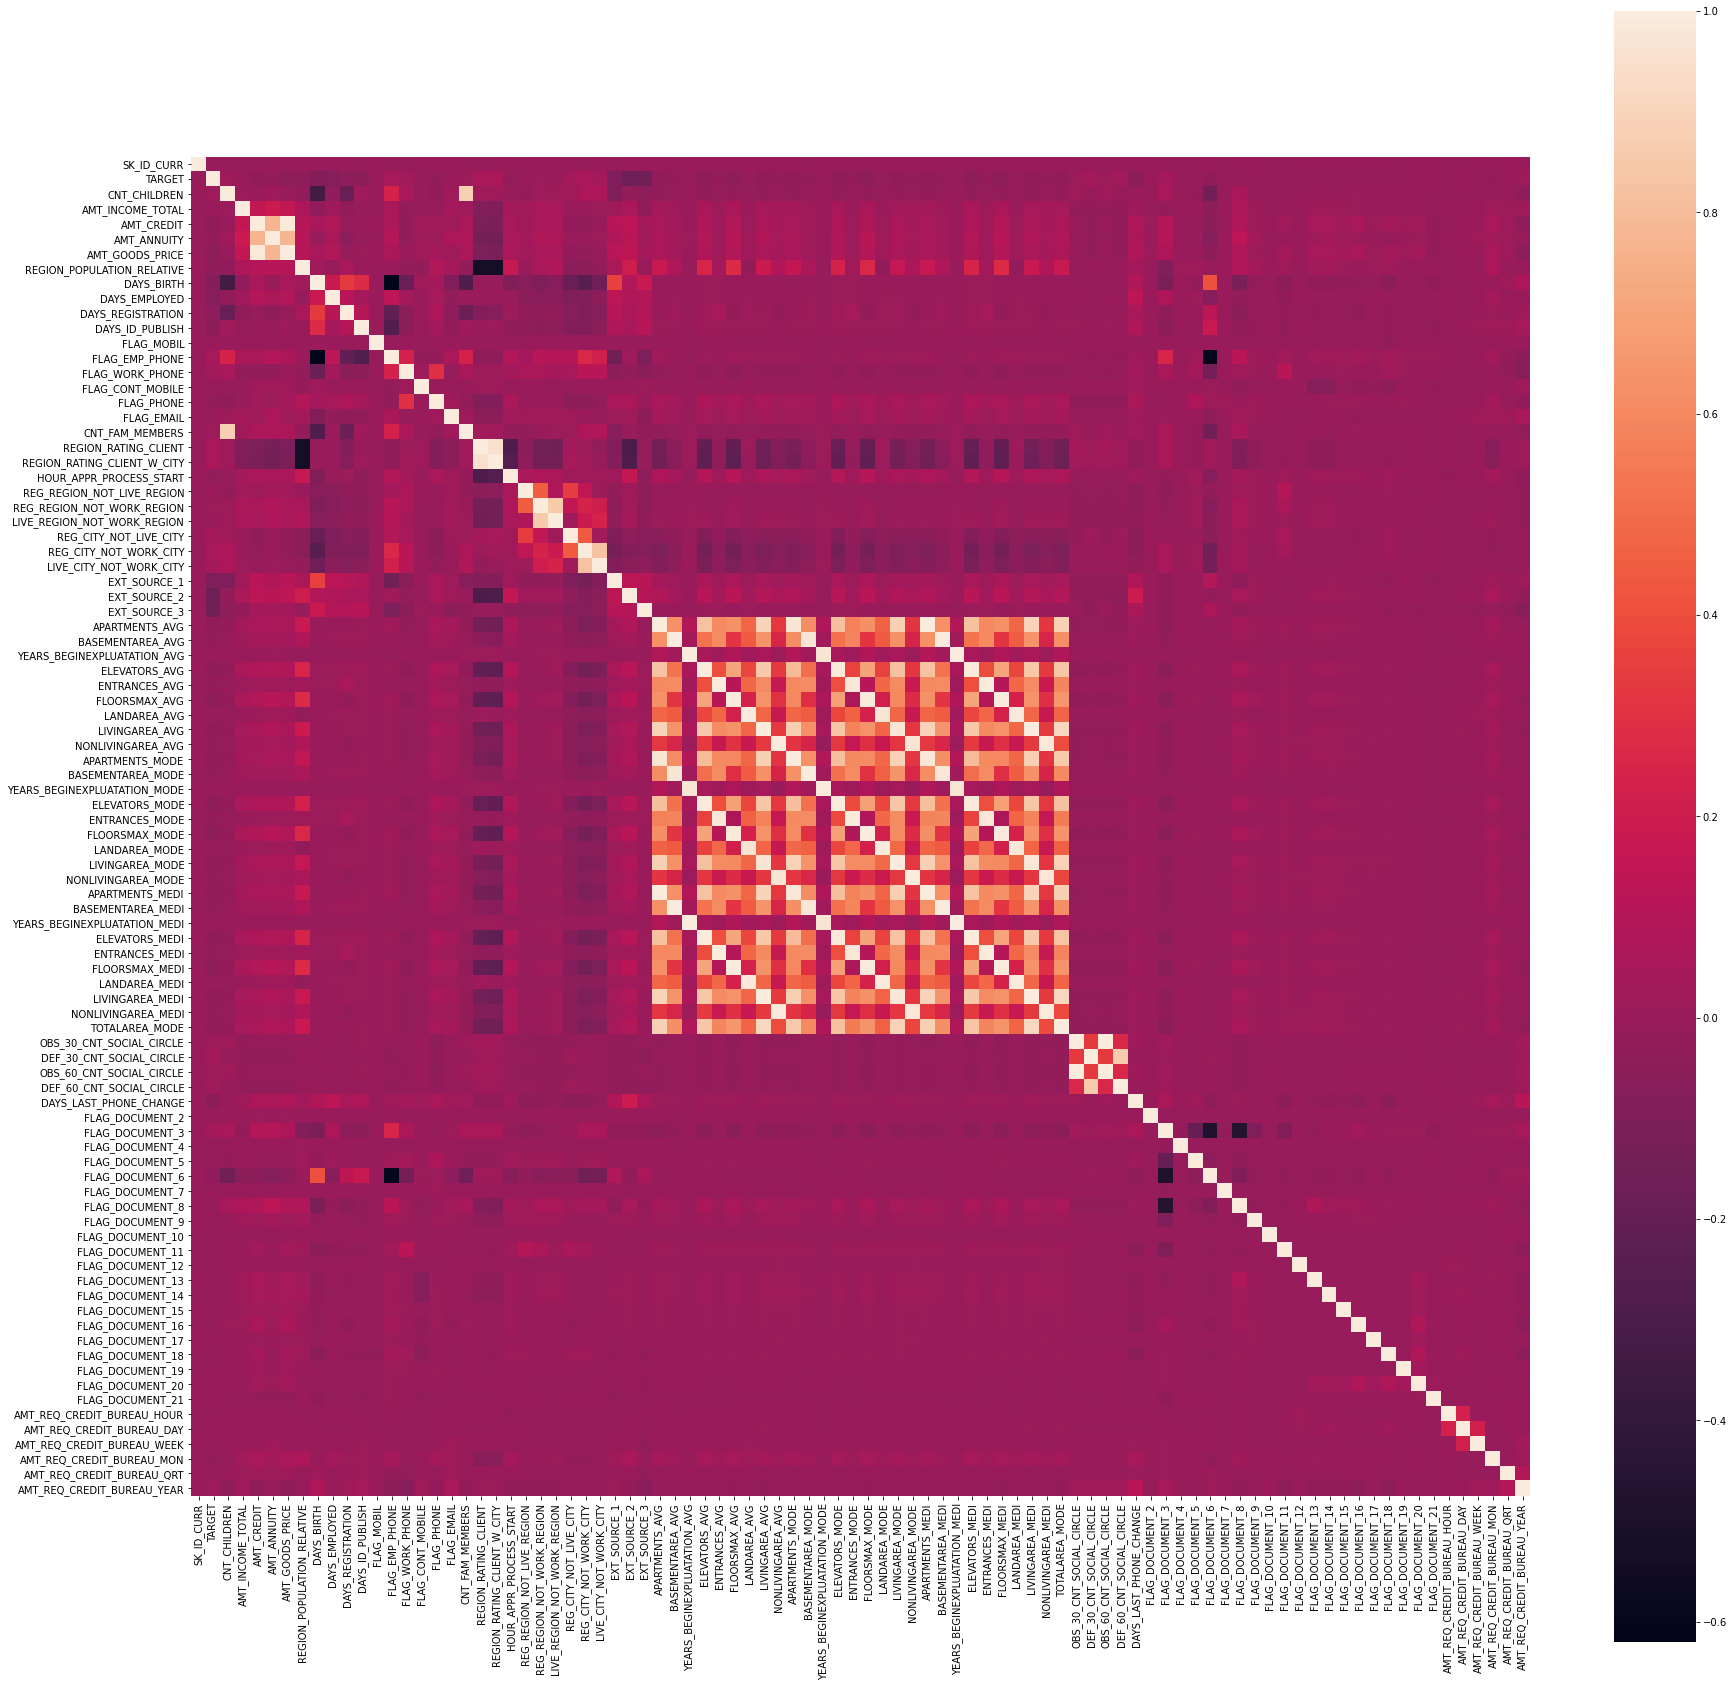

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(application_train_corr, square=True);
plt.show()

In [ ]:
remove_features = ['CNT_FAM_MEMBERS', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE']
application_train = application_train.drop(remove_features,1)
application_test = application_test.drop(remove_features,1)

In [ ]:
missing_data(application_train).head()

,Total,Percent
AMT_REQ_CREDIT_BUREAU_YEAR,0,0.0
ORGANIZATION_TYPE,0,0.0
REGION_RATING_CLIENT,0,0.0
REGION_RATING_CLIENT_W_CITY,0,0.0
WEEKDAY_APPR_PROCESS_START,0,0.0


In [ ]:
application_train.to_csv('/content/drive/MyDrive/loan/train.csv', index = False)

In [ ]:
application_train = pd.read_csv('/content/drive/MyDrive/loan/train.csv')

In [ ]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,6,7,4,3,1,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,8,2,2,6,10,0,0,0,0,0,0,5,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.0000,0,0.0149,5,0,2,2,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,100003,0,0,0,0,0,0,270000.0,1293502.5,1,4,1,1,1,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,3,1,1,1,11,0,0,0,0,0,0,39,0.311267,0.622246,0.510939,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0000,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.0100,0,0.0714,0,0,1,0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6,7,4,3,1,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,8,2,2,1,9,0,0,0,0,0,0,11,0.502172,0.555912,0.729567,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,0,0.0687,4,0,0,0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,0,1,0,135000.0,312682.5,6,7,4,0,1,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,8,2,2,6,17,0,0,0,0,0,0,5,0.502172,0.650442,0.510939,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,0,0.0687,4,0,2,0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,100007,0,0,1,0,1,0,121500.0,513000.0,6,7,4,3,1,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,3,2,2,4,11,0,0,0,0,1,1,37,0.502172,0.322738,0.510939,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,0,0.0687,4,0,0,0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
missing_data(application_test).head()

,Total,Percent
AMT_REQ_CREDIT_BUREAU_YEAR,0,0.0
OCCUPATION_TYPE,0,0.0
REGION_RATING_CLIENT_W_CITY,0,0.0
WEEKDAY_APPR_PROCESS_START,0,0.0
HOUR_APPR_PROCESS_START,0,0.0


In [ ]:
application_train.shape


(298869, 100)

In [ ]:
application_test.shape

(48744, 99)

Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cat_features = application_train.select_dtypes('object')
cat_features.columns

Index([], dtype='object')

In [ ]:
for col in application_train.columns:
    le = LabelEncoder()
    if application_train[col].dtypes == np.object:
        application_train[col] = le.fit_transform(application_train[col])
        application_test[col] = le.transform(application_test[col])

In [ ]:
application_train.sample(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
229275,365555,0,0,1,0,0,0,126000.0,225000.0,6,7,4,3,1,0.028663,13992,5050,1508.0,4241,1,1,0,1,0,0,8,2,2,1,9,0,0,0,0,0,0,5,0.502172,0.713810,0.832785,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,0,0.0687,4,0,0,0,831.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
123745,243507,0,0,0,0,1,0,54000.0,112500.0,1,7,4,0,1,0.030755,19360,1797,637.0,2894,1,1,0,1,0,0,14,2,2,2,10,0,0,0,0,0,0,42,0.502172,0.674770,0.723837,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,0,0.0687,4,0,0,0,603.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5
202346,334569,0,0,0,0,1,0,315000.0,679500.0,1,7,1,1,1,0.022625,15527,3792,7299.0,4296,1,1,1,1,1,0,0,2,2,1,9,0,0,0,0,0,0,5,0.676300,0.702207,0.291097,0.2227,0.1547,0.9796,0.16,0.1379,0.3333,0.0991,0.2159,0.0257,0.2269,0.1606,0.9796,0.1611,0.1379,0.3333,0.1014,0.2250,0.0272,0.2248,0.1547,0.9796,0.16,0.1379,0.3333,0.1008,0.2198,0.0263,0,0.2210,4,0,0,0,513.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
53261,161684,0,0,1,1,1,1,270000.0,1574532.0,6,7,4,1,1,0.046220,13470,1333,1821.0,4641,1,1,0,1,0,0,8,1,1,6,19,0,0,0,0,0,0,5,0.502172,0.659018,0.413597,0.2598,0.1638,0.9866,0.28,0.2414,0.3333,0.1183,0.2702,0.0277,0.2647,0.1700,0.9866,0.2820,0.2414,0.3333,0.1210,0.2815,0.0293,0.2623,0.1638,0.9866,0.28,0.2414,0.3333,0.1203,0.2750,0.0283,0,0.2623,4,0,11,0,3282.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2
17180,120040,0,0,0,0,0,0,81000.0,202500.0,6,3,4,1,1,0.018850,20678,1647,1961.0,4163,1,0,0,1,1,0,8,2,2,5,16,0,0,0,0,0,0,57,0.502172,0.473447,0.656158,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,0,0.0687,4,0,5,0,1461.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2
198895,330596,0,0,0,0,0,0,157500.0,900000.0,6,7,1,1,1,0.032561,12300,1700,6422.0,1024,1,1,1,1,1,1,14,1,1,4,13,0,0,0,0,0,0,51,0.814242,0.705043,0.436506,0

In [ ]:
Xtrn = application_train.drop(['TARGET','SK_ID_CURR'],1)
Xtst = application_test.drop(['SK_ID_CURR'],1)
y = application_train['TARGET']

In [ ]:
y.value_counts()

0    274712
1     24157
Name: TARGET, dtype: int64

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Xtrn,y,stratify = y,test_size = 0.3,random_state = 123)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_transform = scaler.fit_transform(X_train)
X_test_transform = scaler.transform(X_test)

X_train_transform = pd.DataFrame(X_train_transform,columns = Xtrn.columns)
X_test_transform = pd.DataFrame(X_test_transform,columns = Xtrn.columns)

Xtst_transform = scaler.transform(Xtst)
Xtst_transform = pd.DataFrame(Xtst_transform,columns = Xtst.columns)

X_train_transform.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-0.323366,-0.720420,-0.719647,-1.502489,-0.577171,0.308573,1.040498,0.438392,0.916024,0.625746,-0.403254,-0.304555,-1.282194,-0.753500,-0.295166,-1.254804,-0.886719,0.0,0.467630,-0.498516,0.044636,-0.624007,-0.246208,0.029097,1.863067,1.926926,-0.973688,-0.939864,-0.124376,-0.230896,-0.205577,-0.2924,-0.547909,-0.467797,-1.194621,-2.733789,-1.111327,-0.191258,-0.190205,-0.095583,0.046426,-0.368624,-0.084616,-0.281266,-0.141934,-0.206166,-0.230791,-0.193049,-0.099215,0.049941,-0.356009,-0.052379,-0.265329,-0.147433,-0.203744,-0.237884,-0.198535,-0.095952,0.045652,-0.365346,-0.080925,-0.278760,-0.141973,-0.207922,-0.231797,-0.088477,-0.221535,-0.093144,-0.087927,1.469551,-0.274291,-1.165769,-0.007574,0.637156,-0.00953,-0.12364,-0.309535,-0.013479,-0.297037,-0.062998,-0.004889,-0.063227,-0.003092,-0.06074,-0.05363,-0.03452,-0.099527,-0.016363,-0.090055,-0.025316,-0.02335,-0.018164,-0.069958,-0.057904,-0.153710,-0.27149,-0.396736,-0.440949
1,-0.323366,-0.720420,1.389570,-1.502489,0.806389,-0.097709,-0.515123,0.438392,-1.440658,-1.683090,-0.403254,-0.304555,0.399873,-0.418138,2.402681,-1.073974,1.152079,0.0,0.467630,-0.498516,0.044636,1.602546,-0.246208,-1.340458,-0.103792,-0.063399,-1.439111,1.512472,-0.124376,-0.230896,-0.205577,-0.2924,-0.547909,-0.467797,-1.341318,2.175225,-0.610363,-1.021412,-1.213056,-0.095583,-0.410543,-0.368624,-1.056550,-1.454082,-0.141934,-1.038872,-0.305370,-1.168495,-0.099215,-0.367242,-0.356009,-1.018009,-1.451899,-0.147433,-1.007128,-0.260308,-1.194845,-0.095952,-0.406828,-0.365346,-1.050173,-1.449150,-0.141973,-1.031099,-0.295288,-0.088477,-1.010461,2.076007,-0.087927,-0.580892,-0.274291,-0.890149,-0.007574,0.637156,-0.00953,-0.12364,-0.309535,-0.013479,-0.297037,-0.062998,-0.004889,-0.063227,-0.003092,-0.06074,-0.05363,-0.03452,-0.099527,-0.016363,-0.090055,-0.025316,-0.02335,-0.018164,-0.069958,-0.057904,-0.153710,-0.27149,-0.396736,-0.440949
2,-0.323366,-0.720420,-0.719647,0.665562,-0.577171,-0.016453,-0.537438,0.438392,-0.655098,0.625746,-0.403254,-0.304555,0.399873,1.896612,-0.283979,0.355043,0.958665,0.0,-2.138442,-0.498516,0.044636,1.602546,-0.246208,0.029097,-0.103792,-0.063399,1.353425,-0.939864,-0.124376,-0.230896,-0.205577,-0.2924,-0.547909,-0

Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE(random_state = 123)

In [ ]:
X_over, y_over = oversampling.fit_resample(X_train_transform, y_train)
X_over = pd.DataFrame(X_over, columns=Xtrn.columns)
y_over = pd.DataFrame(y_over)
y_over.value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    192298
0    192298
dtype: int64

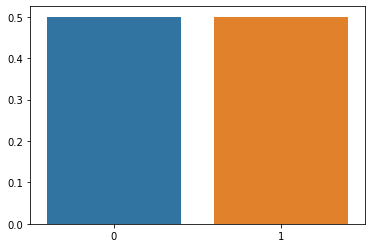

In [ ]:
sns.barplot(x=[0,1], y=y_over.value_counts(normalize=True))

LGBM Classifier

In [ ]:
from lightgbm import LGBMClassifier

lgbmc = LGBMClassifier()
lgbmc.fit(X_over, y_over.values.ravel())

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lgbmc.score(X_over, y_over), lgbmc.score(X_test_transform, y_test)

(0.9552257433774662, 0.9191064119293785)

In [ ]:
lgbmc_predict = lgbmc.predict(Xtst_transform)
lgbmc_predict = pd.DataFrame(lgbmc_predict)
lgbmc_predict.value_counts()

0    48659
1       85
dtype: int64

Model Validation

In [ ]:
from sklearn import model_selection
kfold = model_selection.StratifiedKFold(n_splits=3,shuffle = True, random_state=123)

In [ ]:
lgbm_validation = model_selection.cross_val_score(lgbmc, Xtrn, y, cv=kfold)
print(lgbm_validation)

[0.91922548 0.91943627 0.91951658]
